# Universidad Galileo
# PAPD
# Data Science en Python
# Laboratorio 3 - análisis de datos con Python
# Alumno: Elder Samuel Cruz Carías
# Carne: 23004456

# Parte 1: Numpy

# 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [4]:
import numpy as np

array_booleano = np.ones(1000, dtype=bool)

tamannioenbytes = array_booleano.nbytes

print("El tamaño en bytes de un array de 1000 elementos de tipo booleano es:", tamannioenbytes)

El tamaño en bytes de un array de 1000 elementos de tipo booleano es: 1000


# 2)  Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [5]:
array_enteros_pares = np.arange(2, 101, 2)
array_enteros_pares_decreciente = np.sort(array_enteros_pares)[::-1]
print("Los últimos 10 elementos en orden decreciente son:", array_enteros_pares_decreciente[:10])

Los últimos 10 elementos en orden decreciente son: [100  98  96  94  92  90  88  86  84  82]


# 3) Dado el array 2,4,5,6; 0,3,7,4; 8,8,5,2; 1,5,61.  Seleccione con una instruccion el subarray 0,3,7,4. Despues, seleccione el subarray 2,5;5,5

In [26]:
array = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])


subarray1 = array[1, :]


subarray2_parte1 = array[0, 1:3]
subarray2_parte2 = array[2, 1:3]
subarray2 = np.concatenate((subarray2_parte1, subarray2_parte2))


print("Subarray 1:", subarray1)
print("Subarray 2:", subarray2)

Subarray 1: [0 3 7 4]
Subarray 2: [4 5 8 5]


# 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b)

In [27]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])


diferencia = a - b


media_diferencia = np.mean(diferencia)

print("La media aritmética de la diferencia entre a y b es:", media_diferencia)

La media aritmética de la diferencia entre a y b es: -0.25


# 5) Tengo valores de cordenadas (x, y) en las columnas del array fila 1: 1.33, 4.5;  fila 2: 30.0, 10.7; fila 3: 70.2, 0.5.  Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [28]:
coordenadas_existentes = np.array([[1.33, 4.5],
                                   [30.0, 10.7],
                                   [70.2, 0.5]])


nuevo_array = np.vstack([coordenadas_existentes, [37.1, -3.6]])


print("Dimensiones del nuevo array:", nuevo_array.shape)

Dimensiones del nuevo array: (4, 2)


# 6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [29]:
# array del ejercicio anterior
coordenadas_existentes = np.array([[1.33, 4.5],
                                   [30.0, 10.7],
                                   [70.2, 0.5]])

# Transponer el array copiado
array_transpuesto = coordenadas_existentes.T

# Agregar los nuevos pares de coordenadas al array transpuesto
nuevas_coordenadas = np.array([[10.8, 3.0],
                               [35.8, 12.0]])
array_transpuesto = np.hstack([array_transpuesto, nuevas_coordenadas.T])

# Mostrar las dimensiones del nuevo array transpuesto
print("Dimensiones del nuevo array transpuesto:", array_transpuesto.shape)


Dimensiones del nuevo array transpuesto: (2, 5)


# Parte 2: Exploración y Minería de Datos

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


# 1) ¿Cuántos Municipios tienen más de 100,000 habitantes?

In [36]:
municipios_mas_100K = dataset[dataset['Poblacion'] > 100000] # Filtrar el dataset donde la población supera los 100K habitantes
num_municipios_mas_100K = len(municipios_mas_100K) # Contar el número de municipios que cumplen con la condicion

print("La cantidad de municipios que tienen más de 100,000 habitantes asciende a:", num_municipios_mas_100K)

La cantidad de municipios que tienen más de 100,000 habitantes asciende a: 62


# 2) Realice gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda: a.) ¿Cuál es la segunda ciudad más poblada?, b.¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

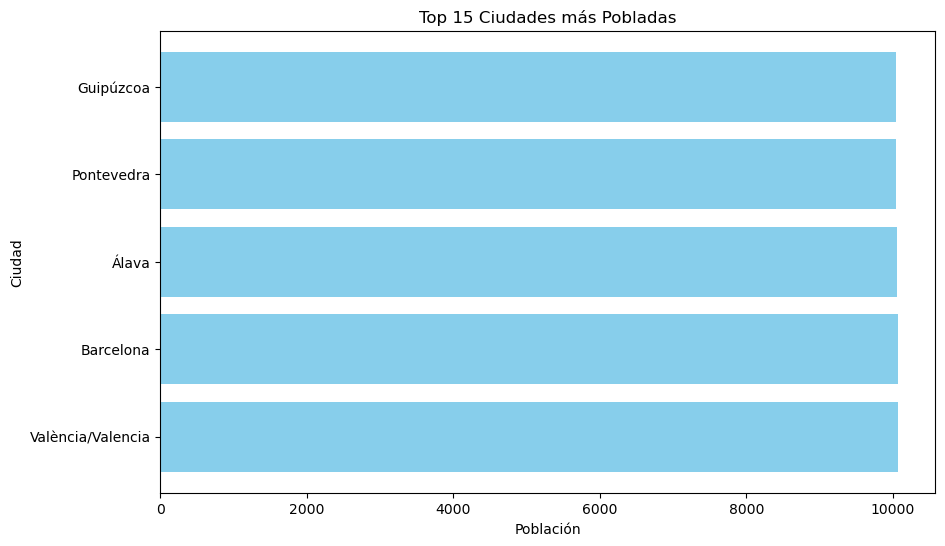

In [62]:
dataset_ordenado = dataset.sort_values(by='Poblacion') #Ordernar variable poblacion de forma ascendente
top_ciudades = dataset_ordenado.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_ciudades['Provincia'], top_15_ciudades['Poblacion'], color='skyblue')
plt.xlabel('Población')
plt.ylabel('Ciudad')
plt.title('Top 15 Ciudades más Pobladas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

In [63]:
# Respuestas a las preguntas
segunda_ciudad_mas_poblada = dataset_ordenado.iloc[-2]['Municipio']
posicion_granada = dataset_ordenado[dataset_ordenado['Municipio'] == 'Granada'].index[0] + 1

print("a) La segunda ciudad más poblada es:", segunda_ciudad_mas_poblada)
print("b) Granada ocupa la posición número:", posicion_granada, "en el ranking de las ciudades más pobladas.")

a) La segunda ciudad más poblada es: Barcelona
b) Granada ocupa la posición número: 273 en el ranking de las ciudades más pobladas.


# 3) ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

In [65]:
municipios_navarra = dataset[dataset['Provincia'] == 'Navarra'] # Filtrar el dataset para incluir solo las filas de Navarra
municipios_mas_5000_navarra = municipios_navarra[municipios_navarra['Poblacion'] > 5000]
num_municipios_mas_5000_navarra = len(municipios_mas_5000_navarra)
print("El número de municipios de Navarra con más de 5000 habitantes es:", num_municipios_mas_5000_navarra)


El número de municipios de Navarra con más de 5000 habitantes es: 11


# 4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [67]:
municipio_norte = dataset.loc[dataset['Y'].idxmax()] # Encontrar el municipio más al norte
print("Municipio más al norte:")
print("Nombre:", municipio_norte['Municipio'])
print("Provincia:", municipio_norte['Provincia'])
print("Población:", municipio_norte['Poblacion'])
print("Coordenada Y (latitud):", municipio_norte['Y'])

Municipio más al norte:
Nombre: Viveiro
Provincia: Lugo
Población: 16211.0
Coordenada Y (latitud): 43.6255783851


# 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [68]:
municipios_granada = dataset[dataset['Provincia'] == 'Granada'] #filtrar municipios de provincia Granada

#Calculos requeridos
media_poblacion = municipios_granada['Poblacion'].mean()
mediana_poblacion = municipios_granada['Poblacion'].median()
desviacion_estandar_poblacion = municipios_granada['Poblacion'].std()
max_poblacion = municipios_granada['Poblacion'].max()
min_poblacion = municipios_granada['Poblacion'].min()

#Resultados:
print("Media de población:", media_poblacion)
print("Mediana de población:", mediana_poblacion)
print("Desviación estándar de población:", desviacion_estandar_poblacion)
print("Valor máximo de población:", max_poblacion)
print("Valor mínimo de población:", min_poblacion)

Media de población: 30217.85
Mediana de población: 17526.0
Desviación estándar de población: 50355.49171459277
Valor máximo de población: 239154.0
Valor mínimo de población: 10386.0


# 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

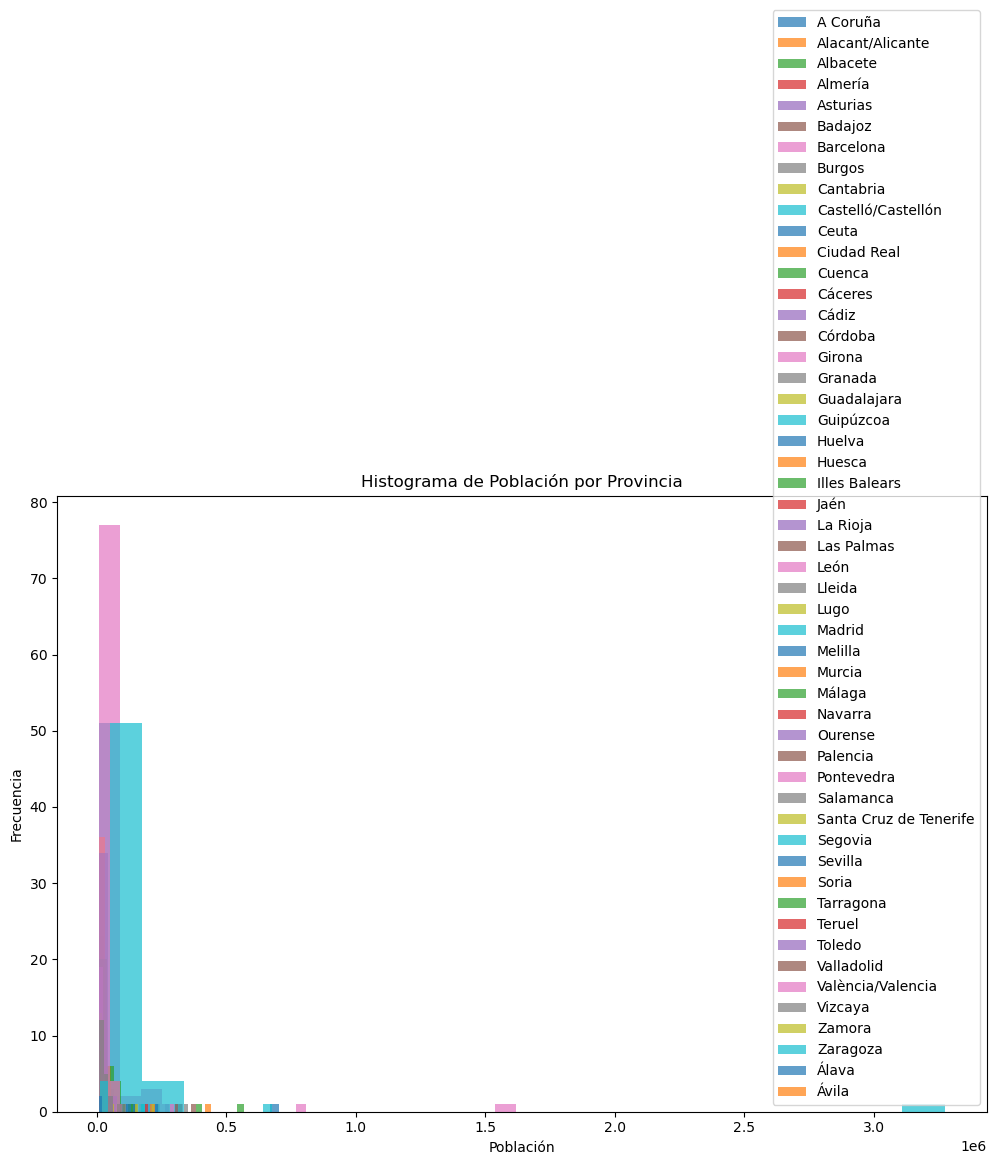

In [74]:
grupos_provincia = dataset.groupby('Provincia')['Poblacion'] #Agrupar por columna Provincia

#Crear histograma
plt.figure(figsize=(12, 8))
for provincia, poblacion in grupos_provincia:
    plt.hist(poblacion, bins=20, alpha=0.7, label=provincia)

plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Histograma de Población por Provincia')
plt.legend()
plt.show()

# 7) Seleccione al azar cincuenta municipios diferentes de entre los disponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [76]:
total_municipios = len(dataset) #total de municipios en el dataset
num_municipios_seleccionar = 50 #municipios a seleccionar random o al azar


if total_municipios < num_municipios_seleccionar:
    print("No hay suficientes municipios en el dataset para seleccionar al azar.")
else:
    municipios_seleccionados = np.random.choice(dataset['Municipio'].unique(), num_municipios_seleccionar, replace=False)
    dataset_seleccionados = dataset[dataset['Municipio'].isin(municipios_seleccionados)]
    promedio_poblacion = dataset_seleccionados['Poblacion'].mean()
    desviacion_estandar_poblacion = dataset_seleccionados['Poblacion'].std()
    
    
    print("Promedio de población de los 50 municipios seleccionados:", promedio_poblacion)
    print("Desviación estándar de población de los 50 municipios seleccionados:", desviacion_estandar_poblacion)

Promedio de población de los 50 municipios seleccionados: 35544.51724137931
Desviación estándar de población de los 50 municipios seleccionados: 37551.08318303209


# 8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la  distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [77]:
lat_madrid, lon_madrid = 40.4168, -3.7038 #Coordenadas de Madrid longitud y latitud en grados decimales


# Calcular la distancia aproximada entre cada municipio y Madrid (aproximación en km)
dataset['Distancia_Madrid'] = np.sqrt((dataset['Y'] - lat_madrid)**2 + (dataset['X'] - lon_madrid)**2)

municipio_mas_cercano = dataset.loc[dataset['Distancia_Madrid'].idxmin()]['Municipio']
municipio_mas_lejano = dataset.loc[dataset['Distancia_Madrid'].idxmax()]['Municipio']

# Mostrar los resultados
print("Municipio más cercano a Madrid:", municipio_mas_cercano)
print("Municipio más lejano a Madrid:", municipio_mas_lejano)

Municipio más cercano a Madrid: Madrid
Municipio más lejano a Madrid: Los Llanos de Aridane
